## Linear Regression
- Y = wx + B
- Y = DependentVariable
- X = Independent Variable
- W = Weight
- B = Bias

### Gradient Decent
Gradient Decent is an optimization algorithim used for minimizinf the loss funtion in various machine learning algorithim. IT is used for updating the parameters of the learning model.
- w = w-a*dw
- b=b-a*db


### Learning Rate  (a)
    Learning Rate is a tuning parameter in an optimization algoritim that determine the step size at each iteration while moving towards a minimum of loss function
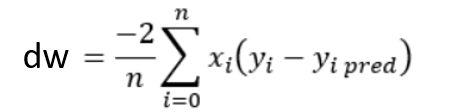
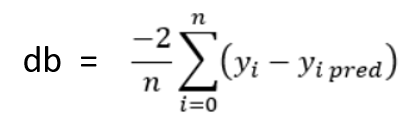

In [298]:
class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):

    # number of training examples & number of features

    self.m, self.n = X.shape  # number of rows & columns

    # initiating the weight and bias 

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent
    
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights
    
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
 

  def predict(self, X):

    return X.dot(self.w) + self.b


In [299]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [300]:
# loading the data set
salary_data = pd.read_csv('salary_data.csv')

In [301]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [302]:
salary_data.shape

(30, 2)

In [303]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

spliting the features and target

In [304]:
X = salary_data.iloc[:,:-1].values

In [305]:
Y = salary_data.iloc[:,1].values

### Spliting the dataset into train and test

In [306]:
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.33, random_state=2)

Training the linear regression model

In [307]:
model = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)

In [308]:
model.fit(X_train, Y_train)

In [309]:
# print the parameters

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9580.301196603597
bias =  23226.38946603212


## Predict salary values for test daata


In [310]:
test_data_prediction = model.predict(X_test)

In [311]:
test_data_prediction

array([ 35680.78102162,  33764.7207823 ,  66337.74485075,  58673.50389347,
        91246.52796192,  80708.19664565, 101784.85927818,  51967.29305584,
        42386.99185924,  88372.43760294])

## Visualizing the predicted values and actual values 

Text(0.5, 1.0, 'Salary vs Experience')

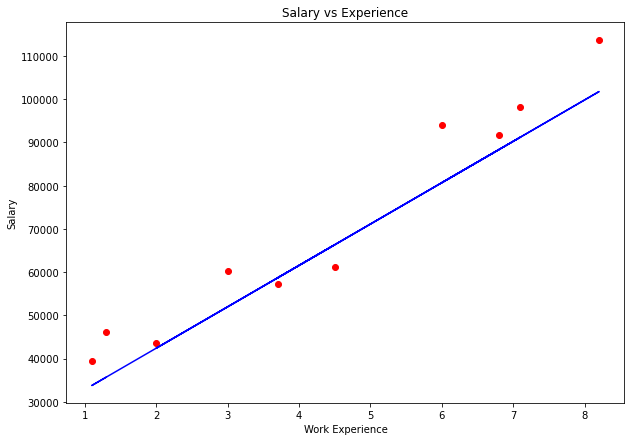

In [312]:
plt.figure(figsize=(10,7))
plt.scatter(X_test,Y_test, color = 'Red')
plt.plot(X_test,test_data_prediction, color = 'Blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')


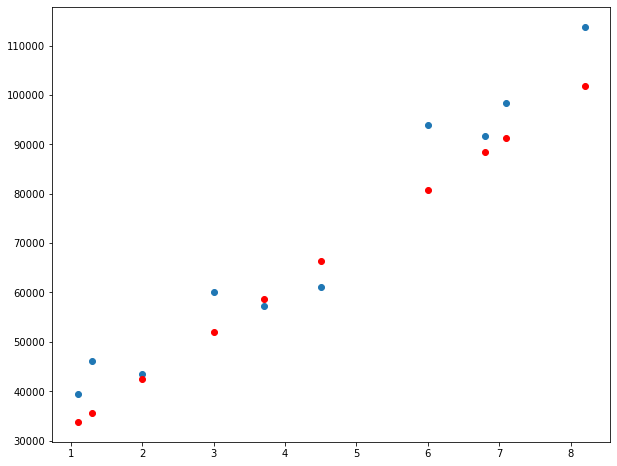

In [318]:
plt.figure(figsize=(10,8))
plt.scatter(X_test,Y_test)
plt.scatter(X_test,test_data_prediction,color ='Red')